Python Version

In [1]:
import sys
print(sys.version)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]


Sum

In [2]:
i = 3+1
print(i)

4


Widgets

In [3]:
import time
import sys
import os

import threading

#Display clontrol library
from IPython import display
from ipywidgets import Button, HBox, VBox, Layout, Label, IntSlider
import ipywidgets as widgets
import ipywidgets
from IPython.display import display, clear_output

control widgets

In [4]:
# lateral control with buttons

# left
button1 = Button(description='left',
           layout=Layout(width='33%', height='70px'))
# s_forward
button2 = Button(description='s_forward',
           layout=Layout(width='33%', height='70px'))
# right
button3 = Button(description='right',
           layout=Layout(width='33%', height='70px'))

hbox1 = HBox([button1,button2,button3])

# lateral control with slider

slider1 = widgets.FloatSlider(
            value=307.0,
            min=245.0,
            max=370.0,
            step=1.0,
            description='steering:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='.1f'
        )

vbox_1_Lateral_control_display = VBox([Label('Lateral Control:'), slider1, hbox1])# create the Lateral_control_display


# longitudinal control

# reverse
button4 = Button(description='reverse',
           layout=Layout(width='33%', height='70px'))
# stop
button5 = Button(description='stop',
            button_style= 'danger',
            layout=Layout(width='33%', height='70px'))
# p_forward
button6 = Button(description='p_forward',
           layout=Layout(width='33%', height='70px'))

hbox2 = HBox([button4,button5,button6])

# longitudinal control with slider max=350
slider2 = widgets.FloatSlider(
            value=330.0,
            min=320.0,
            max=350.0,
            step=1.0,
            description='power:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='.1f'
        )

vbox_2_Longitudinal_control_display = VBox([Label('Longitudinal Control:'), slider2, hbox2])# create the Lateral_control_display

output = widgets.Output()

#clear output button
button7 = Button(description='clear',
           layout=Layout(width='70px', height='70px'))

# manual/auto
button8 = ipywidgets.ToggleButton(description='Auto',
            button_style='info', 
            layout=Layout(width='70px', height='70px'))

vbox_3 = VBox([button7,button8])

hbox3 = HBox([vbox_1_Lateral_control_display,vbox_2_Longitudinal_control_display,vbox_3,output]) 

# End display all
display(hbox3)# End display all

# Now all the functions to control

# steering functions

def on_button1_clicked(b):
    with output:
        value = 370
        print("left:",value)

button1.on_click(on_button1_clicked)

def on_button2_clicked(b):
    with output:
        value = 307
        print("s_forward:",value)

button2.on_click(on_button2_clicked)

def on_button3_clicked(b):
    with output:
        value = 245
        print("right:",value)

button3.on_click(on_button3_clicked)

def on_slider1_change(change):
    with output:
        print("steering:",change['new'])

slider1.observe(on_slider1_change, names='value')


#control motor power functions

# reverse button control
def on_button4_clicked(b):
    with output:
        value = 320
        print("reverse:",value)

button4.on_click(on_button4_clicked)

#stop button function
def on_button5_clicked(b):
    with output:
        value = 330
        print("stop:",value)

button5.on_click(on_button5_clicked)

# power button control function
def on_button6_clicked(b):
    with output:
        value = 345
        print("p_forward:",value)
        
button6.on_click(on_button6_clicked)

# power control slider
def on_slider2_change(change):
    with output:
        print("power:",change['new'])

slider2.observe(on_slider2_change, names='value')

#clear output funcition
def on_button7_clicked(b):
    output.clear_output()
    pass

button7.on_click(on_button7_clicked)

# manual/auto
def on_button8_clicked(change):
    with output:
        print('auto:',change['new'])


button8.observe(on_button8_clicked, 'value')

def auto(change):
    with output:
        if(change['new']==True):
            print("loop:",change['new'])
            execute_thread = threading.Thread(target=loop, args=(button8,))
            execute_thread.start()
        
        
def loop(button8):
    with output:
        count = 1
        while(button8.value==True):
            time.sleep(1)
            print("loop:",count)
            count = count + 1
        
button8.observe(auto,'value')

Opencv

<PIL.Image.Image image mode=RGB size=160x120 at 0x1717EF9C128>
<PIL.Image.Image image mode=RGB size=80x60 at 0x1717EFA7940>


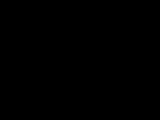

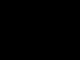

In [5]:
import cv2 as cv
import numpy as np
from IPython import display
import PIL.Image

img_1 = np.zeros((120,160,3), dtype=np.uint8)

img_2 = np.zeros((60,80,3), dtype=np.uint8)

img_1 = PIL.Image.fromarray(img_1)
img_2 = PIL.Image.fromarray(img_2)

print(img_1)
print(img_2)

display.display(img_1,img_2)

Empty image sample

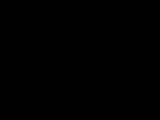

In [6]:
import numpy as np
import cv2
from IPython import display
from PIL import Image

img = np.zeros((120,160),np.uint8)
_,ret_array = cv2.imencode('.jpg',img)
i = display.Image(data=ret_array)
display.display(i)

image overlay

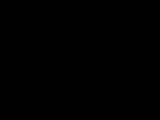

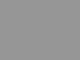

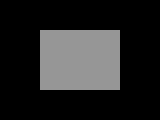

In [7]:
import numpy as np
import cv2
from IPython import display
from PIL import Image
import sys

#image 120x160
image = np.zeros((120,160),dtype=np.uint8)
cv2.imwrite("image.jpg",image)
image=cv2.imread("image.jpg", -1)

#logo 60x80
logo = np.full((60,80),150,dtype=np.uint8)
cv2.imwrite("logo.jpg",logo)
logo=cv2.imread("logo.jpg", -1)

x=40
y=30

image_2 =image.copy()
image_2[y:y+logo.shape[0], x:x+logo.shape[1]]=logo

_,image = cv2.imencode('.jpg', image)
_,logo = cv2.imencode('.jpg', logo)
_,image_2 = cv2.imencode('.jpg', image_2)

image = display.Image(data=image)
logo = display.Image(data=logo)
image_2 = display.Image(data=image_2)

display.display(image,logo,image_2)

Capture WebCam

In [8]:
import cv2
import numpy as np
from IPython import display
from PIL import Image

def showVideo():
    try:
        cap = cv2.VideoCapture(0)
    except:
        print("Cannot Open Device")
    try:
        ret, frame = cap.read()
        
        while(ret==True):
            ret, frame = cap.read()
            
            if not ret:
                cap.release()
                print ("Released Video Resource")
                break
                
            _,ret_array = cv2.imencode('.jpg', frame) 
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)
            
    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource from KeyboardInterrupt")
        
showVideo()

Released Video Resource from KeyboardInterrupt


Pytorch

In [7]:
import torch

Torchvision

In [8]:
import torchvision

GUI with PyQt6

In [ ]:
import sys 
from PyQt6.QtWidgets import *
from PyQt6.QtGui import *

class JanelaPrincipal(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Sistema')
        self.setWindowIcon(QIcon('logo_wilson_eletrica.jpg'))
        self.setGeometry(150, 80, 1000, 600)
        self.Interface()

        self.show()

    def Interface(self):
        self.fundo = QLabel(self)
        self.fundo.setPixmap(QPixmap('fundo.jpg'))
        
        self.img = QLabel(self)
        self.img.setPixmap(QPixmap('esteira.jpg'))
        self.img.move(200,200)
        self.img.resize(200,200)
        
        botao1 = QPushButton('SAIR', self)
        botao1.resize(100,50)
        botao1.move(800,500)
        botao1.clicked.connect(self.sair)
        
        botao2 = QPushButton('MAIUSCULO', self)
        botao2.resize(100,25)
        botao2.move(5,50)
        botao2.clicked.connect(self.maiusculo)
        
        botao3 = QPushButton('minusculo', self)
        botao3.resize(100,25)
        botao3.move(110,50)
        botao3.clicked.connect(self.minusculo)
        
        botao4 = QPushButton('Entrar', self)
        botao4.resize(100,25)
        botao4.move(50,175)
        botao4.clicked.connect(self.salva_dados)
        
        texto1 = QLabel('Hello World!!!', self)
        texto1.resize(100,25)
        texto1.move(5,2)

        self.texto2 = QLabel('Wilson Queiroz!!!', self)
        self.texto2.resize(125,25)
        self.texto2.move(5,25)
        
        texto3 = QLabel('Login', self)
        texto3.resize(100,25)
        texto3.move(25,100)
        
        texto4 = QLabel('Senha', self)
        texto4.resize(100,25)
        texto4.move(25,130)
        
        self.caixa_texto1 = QLineEdit(self)
        self.caixa_texto1.setPlaceholderText('usuário')
        self.caixa_texto1.resize(100,25)
        self.caixa_texto1.move(75,100)
                
        self.caixa_texto2 = QLineEdit(self)
        self.caixa_texto2.setPlaceholderText('senha')
        self.caixa_texto2.setEchoMode(QLineEdit.EchoMode.Password)
        self.caixa_texto2.resize(100,25)
        self.caixa_texto2.move(75,130)
        
    def sair(self):
        sys.exit(qt.exec())
        
    def maiusculo(self):
        self.texto2.setText('WILSON QUEIROZ!!!')
        self.texto2.resize(300,25)
        self.texto2.move(5,25)
        
    def minusculo(self):
        self.texto2.setText('wilson queiroz!!!')
        self.texto2.resize(125,25)
        self.texto2.move(5,25)
        
    def salva_dados(self):
        base = []
        base.append(self.caixa_texto1.text())
        base.append(self.caixa_texto2.text())
        print(base)
        
qt = QApplication(sys.argv)
app = JanelaPrincipal()
sys.exit(qt.exec())

color detection #https://alloyui.com/examples/color-picker/hsv.html

orange

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


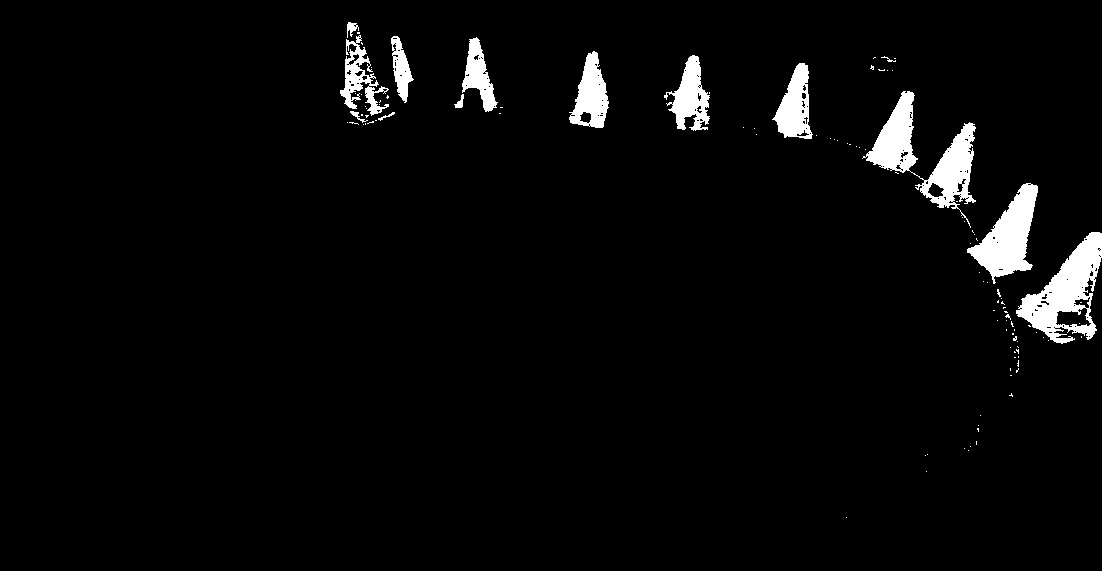

In [89]:
#!/usr/bin/python3
import cv2
import numpy as np
from IPython import display
from PIL import Image

img = cv2.imread("color_test_1.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(2, 100, 90), (4, 255, 200) )#hsv(23, 96, 100)
#cv2.imshow("orange", mask);cv2.waitKey();cv2.destroyAllWindows()
print(mask)
cv2.imwrite("mask_orange.jpg",mask)
mask=cv2.imread("mask_orange.jpg", -1)

_,mask = cv2.imencode('.jpg', mask)
i = display.Image(data=mask)
display.display(i)

green

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


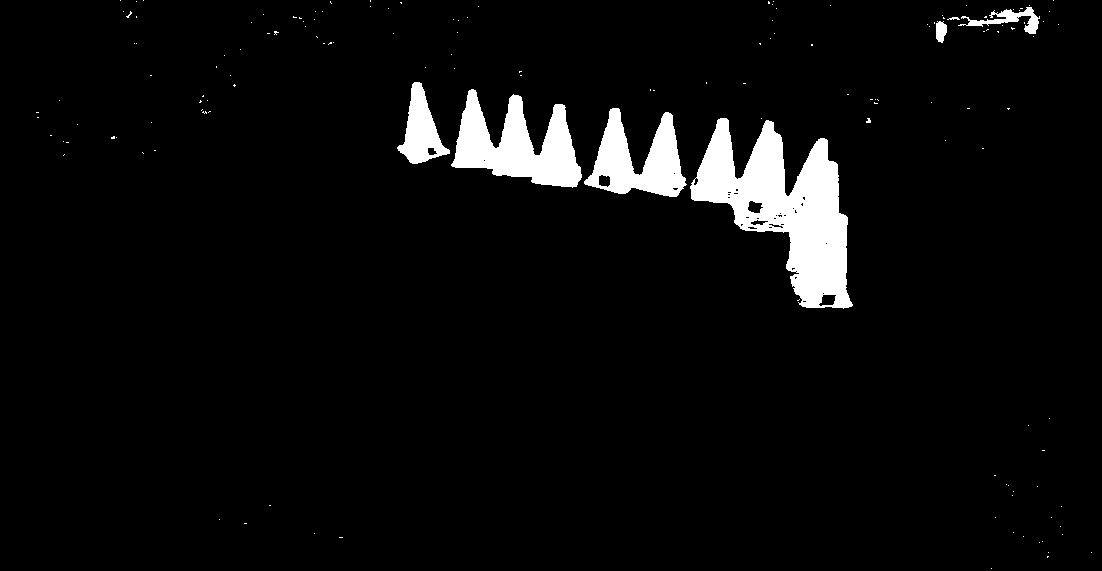

In [90]:
#!/usr/bin/python3
import cv2
import numpy as np
from IPython import display
from PIL import Image

img = cv2.imread("color_test_1.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(30, 30, 10), (60, 255, 255) )#hsv(23, 96, 100)
#cv2.imshow("orange", mask);cv2.waitKey();cv2.destroyAllWindows()

print(mask)
cv2.imwrite("mask_green.jpg",mask)
mask=cv2.imread("mask_green.jpg", -1)

_,mask = cv2.imencode('.jpg', mask)
i = display.Image(data=mask)
display.display(i)